In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
df=pd.read_csv("../GBvideos.csv")

In [4]:
df.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...
5,AumaWl0TNBo,17.14.11,How My Relationship Started!,PointlessBlogVlogs,24,2017-11-11T17:00:00.000Z,"pointlessblog|""pointlessblogtv""|""pointlessblog...",1182775,52708,1431,2333,https://i.ytimg.com/vi/AumaWl0TNBo/default.jpg,False,False,False,► HOW MY RELATIONSHIP STARTED!\n► PB Merch • h...
6,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634124,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
7,-N5eucPMTTc,17.14.11,CHRISTMAS HAS GONE TO MY HEAD,MoreZoella,22,2017-11-10T19:19:43.000Z,"zoe sugg|""zoella""|""zoe""|""vlog""|""vlogging""|""vlo...",1164201,57309,749,624,https://i.ytimg.com/vi/-N5eucPMTTc/default.jpg,False,False,False,CHRISTMAS HAS GONE TO MY HEAD\nPrevious Vlog: ...
8,LMCuKltaY3M,17.14.11,Elbow - Golden Slumbers (John Lewis Advert 2017),ElbowVEVO,10,2017-11-10T08:00:01.000Z,"Elbow|""Golden""|""Slumbers""|""Polydor""|""Alternative""",154494,2163,147,211,https://i.ytimg.com/vi/LMCuKltaY3M/default.jpg,False,False,False,"“Golden Slumbers”, originally by The Beatles, ..."
9,9t9u_yPEidY,17.14.11,"Jennifer Lopez - Amor, Amor, Amor (Official Vi...",JenniferLopezVEVO,10,2017-11-10T15:00:00.000Z,"Jennifer Lopez ft. Wisin|""Jennifer Lopez ft. W...",9548677,190084,15015,11473,https://i.ytimg.com/vi/9t9u_yPEidY/default.jpg,False,False,False,"Jennifer Lopez ft. Wisin - Amor, Amor, Amor (O..."


In [5]:
# which are numerical variables?
df.describe()

,category_id,views,likes,dislikes,comment_count
count,23371.000000,2.337100e+04,2.337100e+04,2.337100e+04,2.337100e+04
mean,17.858414,3.624420e+06,8.986616e+04,6.920528e+03,1.018606e+04
std,7.623867,1.282597e+07,2.589323e+05,6.284157e+04,5.018664e+04
min,1.000000,8.510000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,10.000000,1.489315e+05,3.591000e+03,1.220000e+02,4.215000e+02
50%,22.000000,5.341250e+05,1.411600e+04,4.690000e+02,1.517000e+03
75%,24.000000,2.022316e+06,6.345300e+04,2.021000e+03,5.675500e+03
max,29.000000,2.888120e+08,3.945009e+06,1.944971e+06,1.626501e+06


In [6]:
# can we use publish time in our analysis?
df.publish_time.describe()

count                        23371
unique                        2308
top       2018-02-08T02:00:01.000Z
freq                            40
Name: publish_time, dtype: object

In [7]:
# converting string to datetime 
df['new_publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%X.000Z')

# rounding to a nearest hour for further analysis of the best publishing time
df['new_publish_time_rounded'] = df['new_publish_time'].dt.round('1h')

In [8]:
# separating into publishing date and time for further analysis
df['new_publish_date'] = [d.date() for d in df['new_publish_time_rounded']]
df['new_publish_time_of_day'] = [d.time() for d in df['new_publish_time_rounded']]

In [9]:
# let's check what date & time were lucky to get into trending
df.iloc[:,17:20].describe()

,new_publish_time_rounded,new_publish_date,new_publish_time_of_day
count,23371,23371,23371
unique,1477,207,24
top,2018-01-22 16:00:00,2018-01-25,17:00:00
freq,114,466,2409
first,2007-03-05 16:00:00,NaN,NaN
last,2018-03-12 01:00:00,NaN,NaN


In [10]:
# how many unique days do we have in the dataset?
df.trending_date.describe()

count        23371
unique         117
top       18.06.02
freq           200
Name: trending_date, dtype: object

In [11]:
# converting string to datetime 
df['new_trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

In [52]:
df.new_trending_date.describe()

count                   23371
unique                    117
top       2017-12-27 00:00:00
freq                      200
first     2017-11-14 00:00:00
last      2018-03-12 00:00:00
Name: new_trending_date, dtype: object

In [59]:
df.new_trending_date.value_counts().nlargest(10)

2017-12-27    200
2018-01-23    200
2017-12-15    200
2017-11-19    200
2018-01-20    200
2018-01-07    200
2017-12-25    200
2017-12-12    200
2017-11-29    200
2018-03-10    200
Name: new_trending_date, dtype: int64

In [64]:
df.new_trending_date.value_counts().nsmallest(30)

2017-12-01    198
2018-02-01    199
2018-02-14    199
2018-02-27    199
2018-02-11    199
2018-02-04    199
2018-02-24    199
2017-11-15    199
2018-02-05    199
2018-01-26    199
2018-01-13    199
2017-12-06    199
2017-12-03    199
2018-02-16    199
2018-02-03    199
2018-02-12    199
2018-02-25    199
2017-11-16    199
2018-02-26    199
2018-02-13    199
2018-01-31    199
2018-02-02    199
2018-02-15    199
2018-02-28    199
2017-12-02    199
2018-02-23    199
2018-02-10    199
2018-02-22    199
2017-12-27    200
2018-01-23    200
Name: new_trending_date, dtype: int64

In [13]:
# finding the time difference between publishing and trending 
df['btw_pub_trend'] = df['new_trending_date'] - df['new_publish_time']

# round this to days - we're more interested in days, 
# as the time when the video became trending is not given
df['btw_pub_trend'] = df['btw_pub_trend'].dt.round('1d')
df.iloc[25:27, 21]

25   4 days
26   3 days
Name: btw_pub_trend, dtype: timedelta64[ns]

In [14]:
# convert to int64 since hist gives us an error about the data type
# df['between_publishing_trending'].hist()
df['bw_pub_trend_days'] = (df['btw_pub_trend'].dt.round('1d')).dt.days


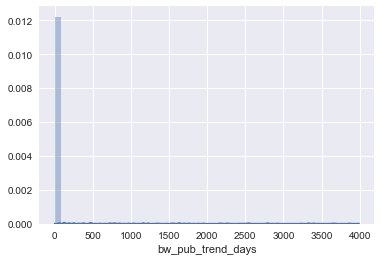

In [15]:
sns.distplot(df['bw_pub_trend_days'], bins = 50)
plt.show()

## YouTube - Trending [UK]

The data represents the archive of videos trending on YouTube in United Kingdom, collected via YouTube API. 

There were not a lot of explanations on which was the cutoff for the video to appear in Trending nor any criteria that could have contributed to the outcome. Also, it is not said if the data contains information about all the trending videos on that day, or only top ones. 

### Data deep-dive

The data collects information for 117 days from 2017-11-14 to 2018-03-12. Practically for every day, there're 200 Trending videos. There 28 days that have information about less than 200 videos by any reason (either 199 or 198 videos). 

##### Outcome variable: views

Five other variables
##### Categorical: category_id, publishing time of the day
##### Continuous: likes, dislikes, comment_count, bw_pub_trend_days

### Univariate analysis

In [65]:
print(len(df.columns))

23


In [29]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'new_publish_time',
       'new_publish_time_rounded', 'new_publish_date',
       'new_publish_time_of_day', 'new_trending_date', 'btw_pub_trend',
       'bw_pub_trend_days'],
      dtype='object')

In [28]:
df.describe()

,category_id,views,likes,dislikes,comment_count,btw_pub_trend,bw_pub_trend_days
count,23371.000000,2.337100e+04,2.337100e+04,2.337100e+04,2.337100e+04,23371,23371.000000
mean,17.858414,3.624420e+06,8.986616e+04,6.920528e+03,1.018606e+04,49 days 20:43:26.923109,49.863506
std,7.623867,1.282597e+07,2.589323e+05,6.284157e+04,5.018664e+04,310 days 17:17:42.931989,310.720636
min,1.000000,8.510000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0 days 00:00:00,0.000000
25%,10.000000,1.489315e+05,3.591000e+03,1.220000e+02,4.215000e+02,4 days 00:00:00,4.000000
50%,22.000000,5.341250e+05,1.411600e+04,4.690000e+02,1.517000e+03,8 days 00:00:00,8.000000
75%,24.000000,2.022316e+06,6.345300e+04,2.021000e+03,5.675500e+03,12 days 00:00:00,12.000000
max,29.000000,2.888120e+08,3.945009e+06,1.944971e+06,1.626501e+06,3989 days 00:00:00,3989.000000


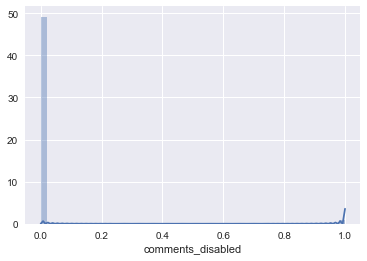

In [36]:
sns.distplot(df['comments_disabled'], bins = 50)

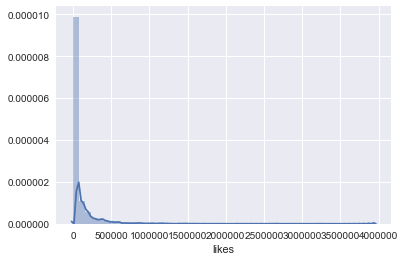

In [34]:
sns.distplot(df['likes'], bins = 50)

We have 23 veriables and 23371 data points. From what I observed during pre-liminary cleaning - there're no missing data. 

#### Continious variables: 
- 'views'
- 'likes'
- 'dislikes'
- 'comment_count'
- 'publish_time' (string format)
- 'new_publish_time' (datetime format)
- 'new_publish_time_rounded' (to hour)
- 'new_publish_date' (only date)
- 'trending_date' (string format)
- 'new_trending_date'(datetime format)
- 'btw_pub_trend', (datedelta format)
- 'bw_pub_trend_days' (int format)


#### Categorical cariables: 
- 'video_id'
- 'title'
- 'channel_title' 
- 'category_id' (despite the fact that we see the variation and other numerical data)
- 'new_publish_time_of_day'
- 'tags'
- 'thumbnail_link' 
- 'comments_disabled' 
- 'ratings_disabled'
- 'video_error_or_removed'
- 'description'

#### Distribution

From my experience:
- Views, likes, dislikes, comment counts in this particular slice of videos are normally distributed with positive skew
- Variable 'bw_pub_trend_days' (days before videos appeared in Trending) is normally distributed with positive skew
- 'comments_disabled', 'ratings_disabled' and 'video_error_or_removed' follow binomial distribution
- other variables don't follow any particular distribution


 
#### Variation
The numerical values, that we can define variation (standart variation) are: views, likes, dislikes, comment counts and days before videos got viral. 

The variation is quite significant for them, the values of almost all these variables start at 0, but then range up to large numbers with several digits.

## Bivariate analysis

/Users/polinav/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


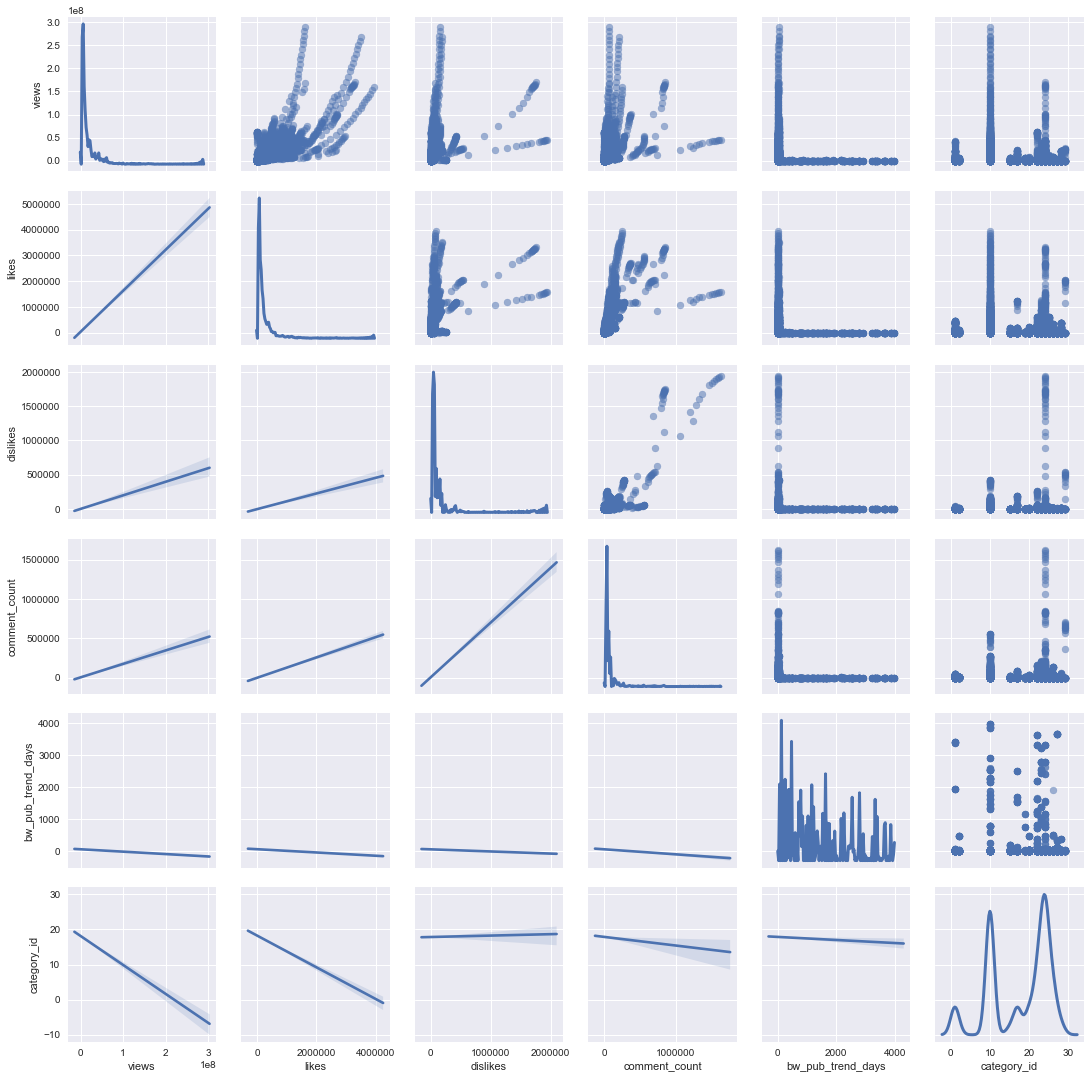

In [66]:
df_features = df[['views', 'likes', 'dislikes', 'comment_count', 'bw_pub_trend_days', 'category_id', 'new_publish_time_of_day']]
g = sns.PairGrid(df_features, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

Correlation with outcome variable: 
Posivite correlation (in order of strenght descending): 
1. likes
2. dislikes
3. comments 

Negative correlation: 
1. Days between publising and trending - less correlated than other continious variables.

Other noticeable correlations: 
1. Comments and dislikes are strongly positively correlated.

## Feature Selection (filtered)

Here's the list of final 5 features that were filtered for the further model building.

1. 'likes' + 'dislikes': reflects engagement which doens't overlap
2. 'likes' + 'dislikes' + 'comment_count': total engagement
3. 'likes' - 'dislikes':  pure positive reaction 
4. ('likes' + 'dislikes') * 'comment_count': comments take more effort and can demostrate stronger reaction
5.  'comment_count' / 'bw_pub_trend_days': the longer days that the video remained on the platform without being in trending, the less engaging it can be. However, if the ratio comments/days is high - can be a hot topic

The filetering was made based on relevance for the outcome [views]. Through these features I tried to expresse the attributes of a video that could be good predictors. For example, the appeal of the video or pure positive reaction (espressed as likes - dislikes) can be reason why more people would watch it.

All these features are about how viewers react to video. They show us the behavior of users (they like, dislike, comment, ignore), so combinations of them will be interesting try in the future models. 